# CRISP-DM Methodology

In [15]:
library(repr)
library(corrplot)

heating <- read.csv("heatingData.csv")
head(heating)

Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
6,74,132,4,23.8,4
10,43,263,4,56.7,4
3,81,145,2,28.0,6
9,50,196,4,45.1,3
2,80,131,5,20.8,2
5,76,129,3,21.5,3


\* based on the plots of heating oil usage relative to the possible variables
#### What factors are related to heating oil usage?
- Insulation: 
<br>
If we assume that the data was collected from diffeent regions of the country, then the people who live in the cold regions will likely be using more heating oil. In addition, households in the cold regions would theoratically have better insulation comapre to the people in the warmer regions where they do not need heating systems.
<br>
$\rightarrow$ This is the reason the plot of insulation vs. amount of heating oil displays such a behavior in the plot below.
<br>
<br>
- Temperature:
<br>
As the temperature increases, the more heating oil people will be using to warm their home. 
<br>
<br>
- Number of Occupation:
Considering an average individual is living alone in a house, the size of the house tends to be smaller compared to the size of the house of a family of four. In this case, the single individual will likely be spending less amount of oil to heat the comparatively small house. 
<br>
<br>
- Average Age:
<br>
Individuals in younger ages have greater resistance to cold temperature compared to individuals in older ages. Therefore, as age gets larger, the amount of heating oil increases relative to individuals' ages.
<br>
<br>
- HomeSize: 
<br>
Assuming two households with the smae condition of insulation for their houses lived in a cold region of the country. If one house is larger compared to the other house, then the house which is bigger will likely to consume more heating oil to heat the entire house.
#### What can we do to predict demand for heating oil? That is, can we anticipate when we'll need to supply more or less?
<br>
We can somewhat accurately predict the usage of heating oil depending on the region of the country. Because each region has a different environmntal and weather condition and people's habitation will vary depending on the location of thier houses.
<br>
Oil suppliers may take this factors or the factors in the question above to adjust their supply to be more or less based on weather or temperature changes of regions.
<br>
<br>
In case of unusual weather conditions such as early seasonal changes of cold wave or hot wave, they are hard to be predict since weather podcase is not always consistant. Yet, the suppliers may react to such information to prepare for increase or decease of oil consumptions taking risks to predict the behavior of consumers in short run.

### Ploting the Heating Data:

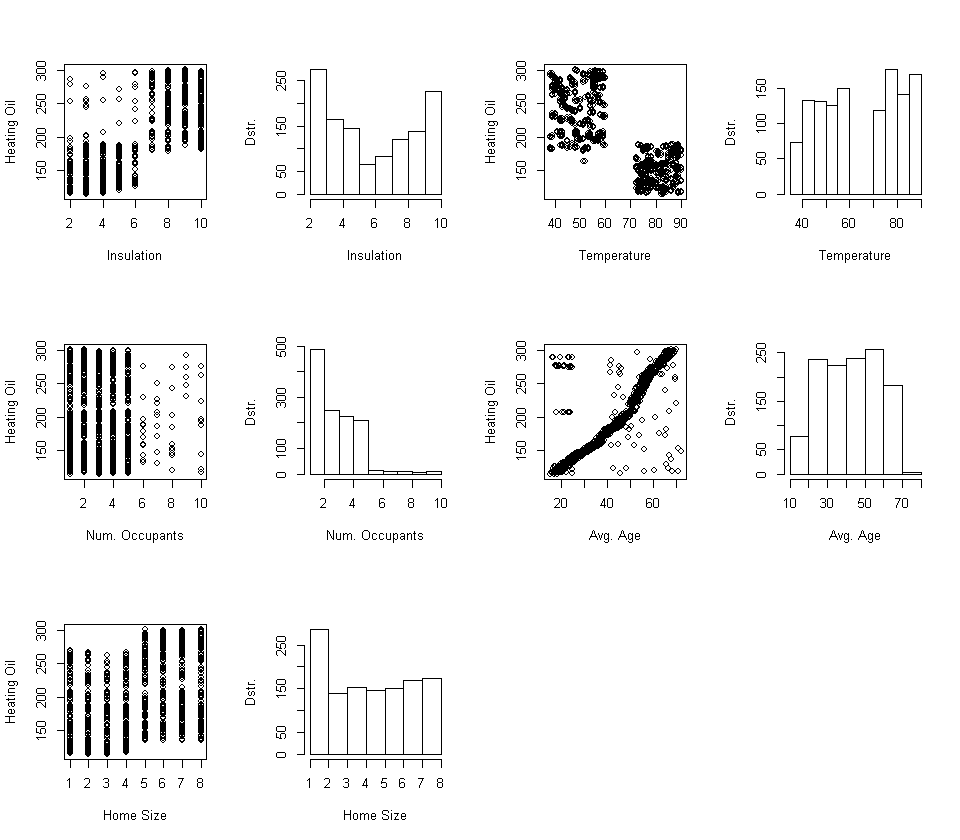

In [2]:
par(mfrow=c(3,4))
options(repr.plot.width=8, repr.plot.height=7)
plot(heating$Insulation, heating$Heating_Oil, xlab = "Insulation", ylab="Heating Oil")
hist(heating$Insulation, xlab = "Insulation", ylab="Dstr.", main="", breaks=9)

plot(heating$Temperature, heating$Heating_Oil, xlab = "Temperature", ylab="Heating Oil")
hist(heating$Temperature, xlab = "Temperature", ylab="Dstr.", main="", breaks=10)

plot(heating$Num_Occupants, heating$Heating_Oil, xlab = "Num. Occupants", ylab="Heating Oil")
hist(heating$Num_Occupants, xlab = "Num. Occupants", ylab="Dstr.", main="", breaks=9)

plot(heating$Avg_Age, heating$Heating_Oil, xlab = "Avg. Age", ylab="Heating Oil")
hist(heating$Avg_Age, xlab = "Avg. Age", ylab="Dstr.", main="", breaks=8)

plot(heating$Home_Size, heating$Heating_Oil, xlab = "Home Size", ylab="Heating Oil")
hist(heating$Home_Size, xlab = "Home Size", ylab="Dstr.", main="", breaks=7)

#### Distributions of the variables:
1) Insulation: bimodal
<br>
2) Temperature: bimodal with a gap at the rage of 60 to 70 ℉
<br>
3) Num. Occupants: right skewed
<br>
4) Avg. Age: normal distribution
<br>
4) Home Sie: The data is evenly distributed except for a avalue that exceeds the evenly distributed tendency.

In [3]:
summary(heating)
heating <- heating[complete.cases(heating), ]

   Insulation      Temperature     Heating_Oil    Num_Occupants   
 Min.   : 2.000   Min.   :38.00   Min.   :114.0   Min.   : 1.000  
 1st Qu.: 4.000   1st Qu.:49.00   1st Qu.:148.2   1st Qu.: 2.000  
 Median : 6.000   Median :60.00   Median :185.0   Median : 3.000  
 Mean   : 6.214   Mean   :65.08   Mean   :197.4   Mean   : 3.113  
 3rd Qu.: 9.000   3rd Qu.:81.00   3rd Qu.:253.0   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :90.00   Max.   :301.0   Max.   :10.000  
    Avg_Age        Home_Size    
 Min.   :15.10   Min.   :1.000  
 1st Qu.:29.70   1st Qu.:3.000  
 Median :42.90   Median :5.000  
 Mean   :42.71   Mean   :4.649  
 3rd Qu.:55.60   3rd Qu.:7.000  
 Max.   :72.20   Max.   :8.000  

#### What factors would you expect to best explain how the amount of Heating Oil usage varies? Why?
Insulation and avegage age.

$\rightarrow$ People in cold regions tend to need heat to protect themselves fromthe cold weather. They tend to have better insulation compared to people from warm regions and use more heating oil at the same time.
<br>
$\rightarrow$ In average, people in older age ranges have less resistence to the temperature of either hot or cold. Therefore, in a cold weather, older people will likely be comsuming more heating oil relative to people in youger ages.

### Are there significant outliers? 

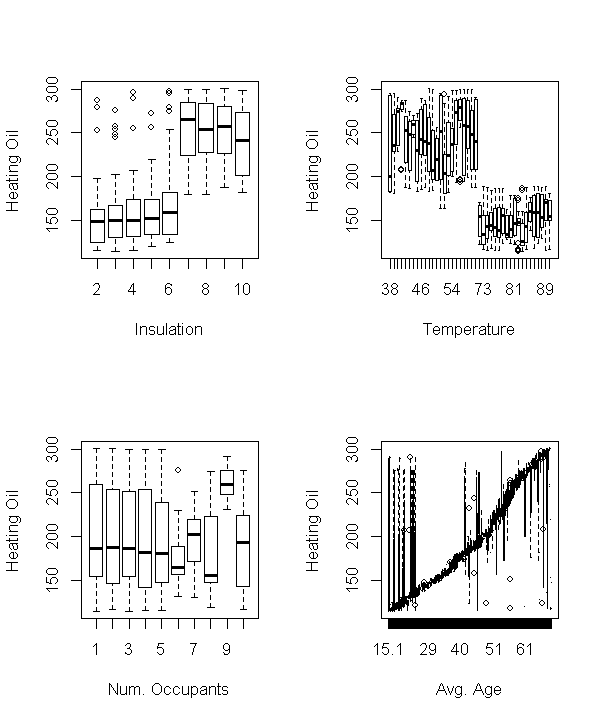

In [4]:
par(mfrow=c(2,2))
options(repr.plot.width=5, repr.plot.height= 6)
insul <- plot(as.factor(heating$Insulation), heating$Heating_Oil, xlab = "Insulation", ylab="Heating Oil")
temp <- plot(as.factor(heating$Temperature), heating$Heating_Oil, xlab = "Temperature", ylab="Heating Oil")
numOcc <- plot(as.factor(heating$Num_Occupants), heating$Heating_Oil, xlab = "Num. Occupants", ylab="Heating Oil")
age <- plot(as.factor(heating$Avg_Age), heating$Heating_Oil, xlab = "Avg. Age", ylab="Heating Oil")
#homeSize <- plot(as.factor(heating$Home_Size), heating$Heating_Oil, xlab = "Home Size", ylab="Heating Oil")

In [5]:
paste("Insulution Outliers:") 
paste(insul$out)
paste("Temperature Outliers:")
temp$out
paste("Num. Occupant Outliers:")
numOcc$out
paste("Age Outliers:")
age$out
paste("No Home Size Outliers")

[1] "Insulution Outliers:"

[1] "287" "253" "279" "253" "245" "248" "257" "276" "254" "255" "289" "296"
[13] "256" "272" "274" "295" "279" "297"

[1] "Temperature Outliers:"

[1] 207 208 294 195 197 193 193 117 123 114 175 124 173 116 173 123 173 186 184

[1] "Num. Occupant Outliers:"

[1] 276

[1] "Age Outliers:"

[1] 207 207 290 121 143 147 152 170 174 232 244 158 123 201 264 151 118 261 266
[20] 288 297 123 208

[1] "No Home Size Outliers"

#### Will the outliers affect your analysis?
$\rightarrow$ When ploting the data set, the outliers would not necessarily be th main factor that affects the analysis of viewers when looking at different plots to analize the data. 
<br>
<br>
However, when graphing regression lines, the outliers can affect to result differently.

### Explore correlations
#### Which are significant? Which look important by eye?
##### Insulution vs. Heating Oil Consumption

In [6]:
cor.test(heating$Insulation, heating$Heating_Oil)


	Pearson's product-moment correlation

data:  heating$Insulation and heating$Heating_Oil
t = 37.922, df = 1216, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7092521 0.7608099
sample estimates:
      cor 
0.7360969 


$\rightarrow$ There is a statistically significant correlation between insulutionand heating oil consumption.

##### Temperature vs. Heating oil Consumption

In [7]:
cor.test(heating$Temperature, heating$Heating_Oil)


	Pearson's product-moment correlation

data:  heating$Temperature and heating$Heating_Oil
t = -42.58, df = 1216, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7952700 -0.7500859
sample estimates:
       cor 
-0.7736597 


$\rightarrow$There is a statistically significant correlation between temperature and heating oil consumption.

##### Number of Occupants vs. Heating oil Consumption

In [8]:
cor.test(heating$Num_Occupants, heating$Heating_Oil)


	Pearson's product-moment correlation

data:  heating$Num_Occupants and heating$Heating_Oil
t = -1.4531, df = 1216, p-value = 0.1464
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09757665  0.01456875
sample estimates:
        cor 
-0.04163508 


$\rightarrow$ The p-value is greater than 0.05, which is 0.1464.
<br>
The correlation between the number of occupants and the heating oil consumption is -0.0416, which means that the heating oil consumption does not dependent on the number of occupants.
##### Average Age vs. Heating oil Consumption

In [9]:
cor.test(heating$Avg_Age, heating$Heating_Oil)


	Pearson's product-moment correlation

data:  heating$Avg_Age and heating$Heating_Oil
t = 55.769, df = 1216, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8313127 0.8629611
sample estimates:
      cor 
0.8478905 


$\rightarrow$There is a statistically significant correlation between the average age and heating oil consumption.

##### Home Size vs. Heating oil Consumption

In [10]:
cor.test(heating$Home_Size, heating$Heating_Oil)


	Pearson's product-moment correlation

data:  heating$Home_Size and heating$Heating_Oil
t = 14.378, df = 1216, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3321325 0.4281924
sample estimates:
      cor 
0.3811908 


$\rightarrow$There is a statistically significant correlation between home sizeand heating oil consumption.

In [11]:
cor(heating)

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
Insulation,1.00000000,-0.79369606,0.73609688,-0.01256684,0.64298171,0.20071164
Temperature,-0.79369606,1.00000000,-0.77365974,0.01251864,-0.67257949,-0.21393926
Heating_Oil,0.73609688,-0.77365974,1.00000000,-0.04163508,0.84789052,0.38119082
Num_Occupants,-0.01256684,0.01251864,-0.04163508,1.00000000,-0.04803415,-0.02253438
Avg_Age,0.64298171,-0.67257949,0.84789052,-0.04803415,1.00000000,0.30655725
Home_Size,0.20071164,-0.21393926,0.38119082,-0.02253438,0.30655725,1.00000000


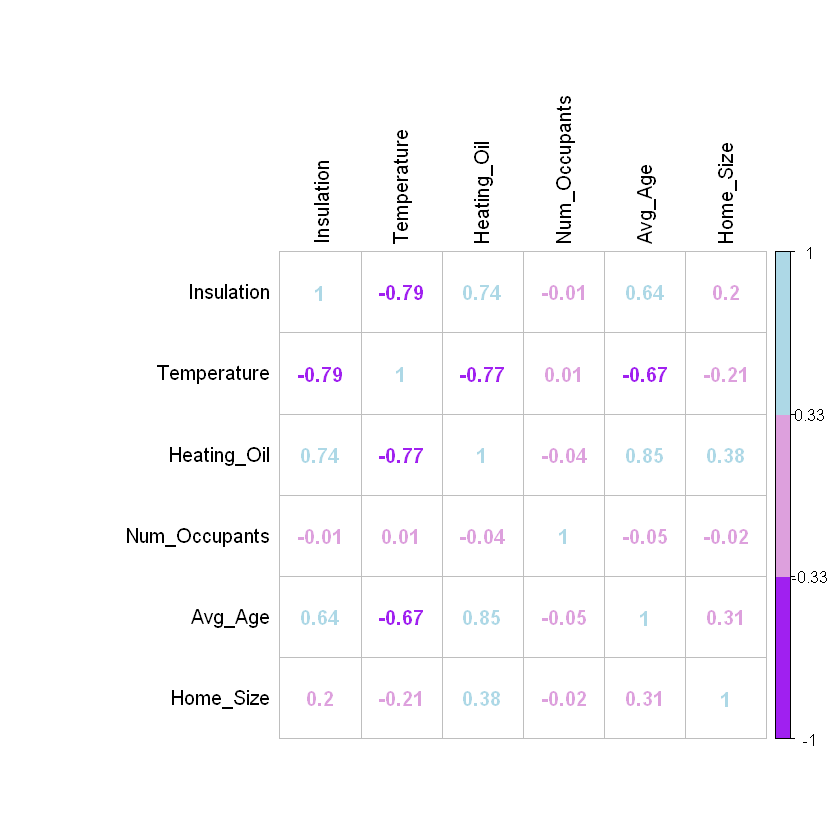

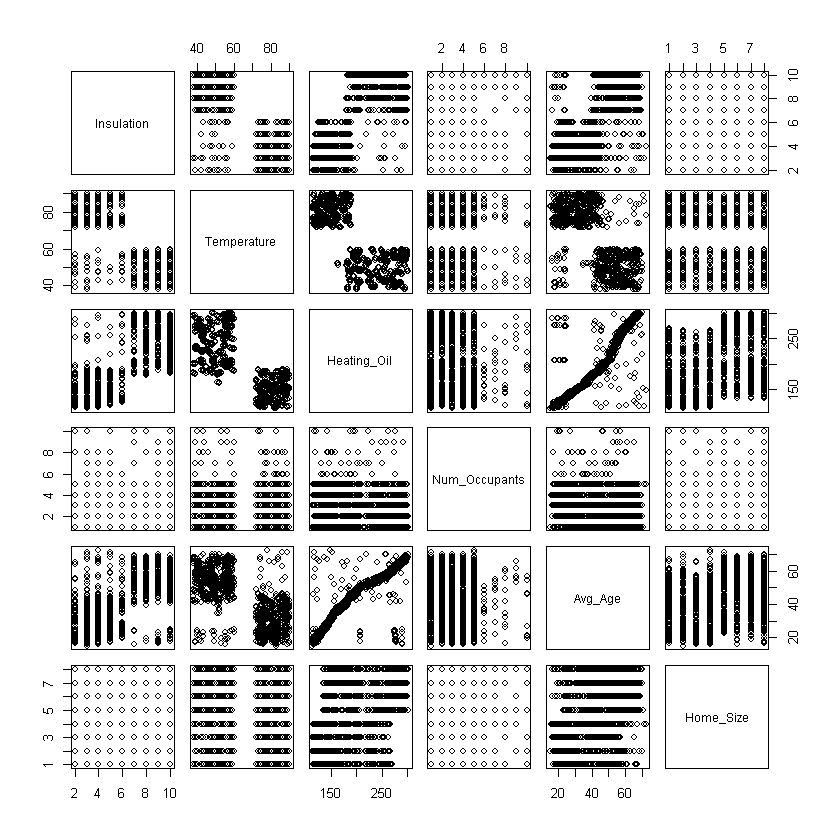

In [57]:
options(repr.plot.width=7, repr.plot.hieght=7)
corrplot(cor(heating), method="number", tl.col="black", col=c("purple","plum","lightblue"))
pairs(heating)

$\rightarrow$ As we can see from the results of corrplot() and pairs(), the positions in which correlations are high in the correlation plot demonstrates positively or negatively strong correlation between variables through the shape of the plots.
<br>
<br>
As presented above, there is a positive correlation between age and heating oil consumption with r = 0.85 as well as between insulution and heating oil consumption with r = 0.74.
<br>
<br>
Also, there is a negative correlation between temperature and heating oil consumption with r = -0.77.

### Evaluation
#### Consider your list of correlations which are significant and/or important. Do they make sense? (Both in strength and whether they are positive and negative)

Heating Oil Consumption vs.
<br>
<br>
1) Insulution: r = 0.74
$\rightarrow$ The better insulution one prepaare, the colder the rigion they live in and the more they consume heating oil.
<br>
<br>
1) Temperature: r = -0.77
$\rightarrow$ The lower the temperature is, the more heating oil people consume.
<br>
<br>
1) Average Age: r = 0.85
$\rightarrow$ The older people are, the lower the resistence cold weather and the more heating oil they consume.

#### Are there any variables for which you expected a correlation but didn't find one?

Under my assumption that larger houses would require a greater amount of heating oil to warm the house compared to a smaller huse. Yet, p-value was not small enough to prove the statistical significance of the relationship between house size and heating oil consumption. This was shouwn by the small value of correlation through corrplot().
<br>
<br>
Also, the correlation between the number of occupants and the heating oil consumption was expected to be large. Yet, the statistical significance was not proven due to the very large p-value and the correlation appears to be extremely small with r = -0.04

### Deployment

#### What variables would you recommend the company use to predict heating oil usage?
temperature, insulution and the average age of the rigional population
#### It costs money to collect data. Which variables could they stop collecting?
number of occupants per household and house size
#### Are there any variables which they haven't included in the dataset that might be useful?
The fluctuation of the oil price in short term.
$\rightarrow$ This is an action to predict consumers' behavior that may happen in the future depending on whetehr the oil price is predicted to either rise or drop. If the oil price is expected to drop in the near future, people will try to buy as much oil as possible to stock in preparation to the rising oil price. 
#### Would you make any changes to how the data are collected?
The data should be collected at each seasonal change. Also, the companies should collect data by rigion since people's behavior on oil consumption changes depending on location and weather of the region.
#### What steps could the company act on these data?
- More accurate scale to categorize or magnify data values
- How much usage of oil is a lot? (standard to determine the quatitative value of a condition.
- A wide range of categories of data $\rightarrow$ might be difficult to determine the limit of a decision making point for either reducing oil or increasing the oil supply.